In [14]:
import numpy as np
import sys
sys.path.append('../..')
from utils.workflow import WorkflowModel
from utils.data import RK4DataGenerator, mono_beta
import utils.plotting as plotting
from utils.eval import eval_predictions

In [15]:
t0, tf, nop = 0, 50, 100
data_t = np.linspace(t0, tf, nop)
rkdata = RK4DataGenerator(mono_beta)
sir_comparts = rkdata.generate(data_t)
sir_data = rkdata.generate(data_t, noise_std=0.0)

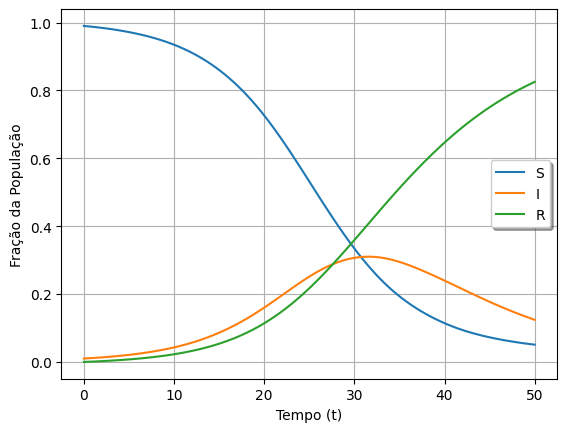

In [16]:
plotting.plot_rk_curves(data_t, sir_data)

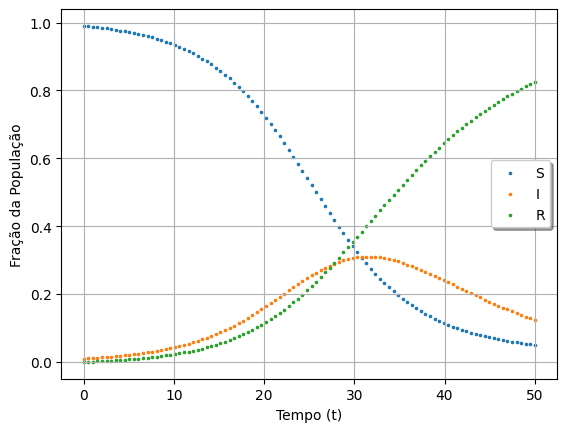

In [17]:
plotting.plot_rk_data(data_t, sir_data)

In [ ]:
model = WorkflowModel(t0, tf, sir_data[:,1], data_t, scaling="norm")
model.S0, model.I0, model.R0 

Compiling model...
'compile' took 0.003298 s



(np.float64(3.299518304099906),
 np.float64(0.0),
 np.float64(-0.03332846771818087))

In [19]:
model.train()

Training model...

Step      Train loss                                            Test loss                                             Test metric
0         [1.11e-01, 8.56e-04, 1.09e+02, 0.00e+00, 5.65e-01]    [3.69e-02, 8.76e-04, 1.09e+02, 0.00e+00, 5.65e-01]    []  
100       [5.80e-03, 7.90e-03, 6.29e-03, 7.85e-05, 1.29e-01]    [5.21e-03, 5.60e-03, 6.29e-03, 7.85e-05, 1.29e-01]    []  
200       [3.63e-03, 7.97e-03, 6.19e-08, 1.50e-04, 1.27e-01]    [2.90e-03, 5.48e-03, 6.19e-08, 1.50e-04, 1.27e-01]    []  
300       [3.16e-03, 7.73e-03, 2.22e-09, 1.47e-04, 1.27e-01]    [2.59e-03, 5.42e-03, 2.22e-09, 1.47e-04, 1.27e-01]    []  
400       [2.91e-03, 7.63e-03, 4.18e-09, 1.45e-04, 1.27e-01]    [2.42e-03, 5.37e-03, 4.18e-09, 1.45e-04, 1.27e-01]    []  
500       [2.69e-03, 7.57e-03, 6.24e-09, 1.45e-04, 1.27e-01]    [2.27e-03, 5.33e-03, 6.24e-09, 1.45e-04, 1.27e-01]    []  
600       [2.50e-03, 7.53e-03, 7.90e-09, 1.46e-04, 1.27e-01]    [2.14e-03, 5.29e-03, 7.90e-09, 1.46e-04, 1.27e-01

(<deepxde.model.LossHistory at 0x7feebb645b90>,
 <deepxde.model.TrainState at 0x7feebb657d50>)

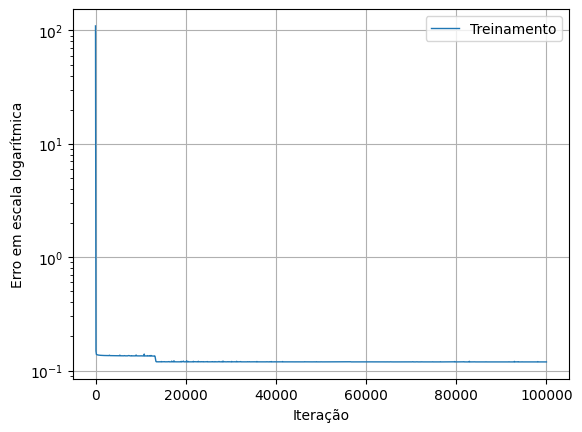

In [20]:
plotting.plot_losshistory(model.losshistory)

In [21]:
predictions = model.predict(data_t)

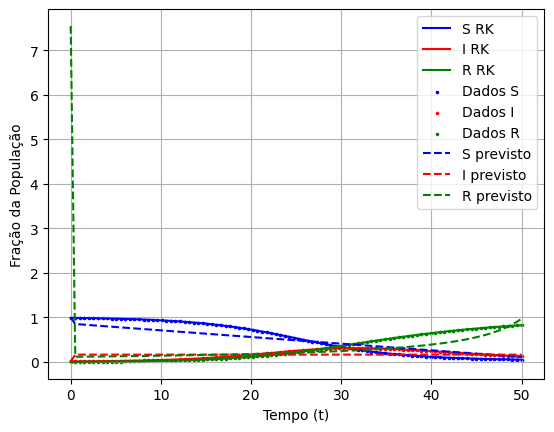

In [22]:
plotting.plot_results(sir_comparts, sir_data, predictions, data_t)

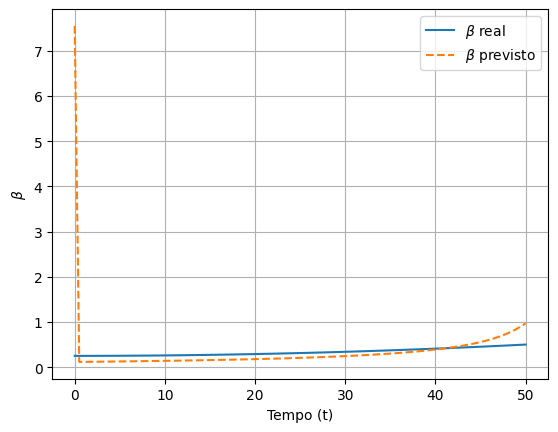

In [23]:
plotting.plot_beta(mono_beta, predictions[:,2], data_t)

In [24]:
eval_predictions(sir_comparts, predictions)

,compartiment,MSE,L2,L-infinity
0,S,0.023603,0.241890,0.231696
1,I,0.010231,0.523204,0.153367
2,beta,0.590733,1.819780,7.548962


In [25]:
model.scaled_I_data

array([0.        , 0.00257487, 0.00534308, 0.00831927, 0.01151915,
       0.01495932, 0.01865782, 0.02263422, 0.02690961, 0.03150654,
       0.03644912, 0.04176293, 0.04747508, 0.05361418, 0.06021034,
       0.06728559, 0.07487006, 0.08301095, 0.09175456, 0.10114623,
       0.11123032, 0.12205026, 0.1336485 , 0.14606655, 0.15934493,
       0.17352324, 0.18864008, 0.20473313, 0.22183909, 0.2399937 ,
       0.25923174, 0.27958508, 0.30103621, 0.32360017, 0.34729898,
       0.37213388, 0.39808527, 0.42511275, 0.4531551 , 0.48213027,
       0.51193541, 0.54244687, 0.57352015, 0.60498996, 0.63667018,
       0.66835389, 0.69981334, 0.73079997, 0.76104441, 0.79025668,
       0.81818555, 0.84464368, 0.8694496 , 0.8924404 , 0.91347179,
       0.93241803, 0.94917199, 0.96364512, 0.97576746, 0.98548761,
       0.99277279, 0.9976088 , 1.        , 0.99996937, 0.99755845,
       0.99282738, 0.98585488, 0.97673826, 0.96565807, 0.9528742 ,
       0.93858753, 0.92298612, 0.90624543, 0.88852828, 0.86998

In [26]:
model.timeinterval.uniform_points(128)

array([[ 0.        ],
       [ 0.39370079],
       [ 0.78740157],
       [ 1.18110236],
       [ 1.57480315],
       [ 1.96850394],
       [ 2.36220472],
       [ 2.75590551],
       [ 3.1496063 ],
       [ 3.54330709],
       [ 3.93700787],
       [ 4.33070866],
       [ 4.72440945],
       [ 5.11811024],
       [ 5.51181102],
       [ 5.90551181],
       [ 6.2992126 ],
       [ 6.69291339],
       [ 7.08661417],
       [ 7.48031496],
       [ 7.87401575],
       [ 8.26771654],
       [ 8.66141732],
       [ 9.05511811],
       [ 9.4488189 ],
       [ 9.84251969],
       [10.23622047],
       [10.62992126],
       [11.02362205],
       [11.41732283],
       [11.81102362],
       [12.20472441],
       [12.5984252 ],
       [12.99212598],
       [13.38582677],
       [13.77952756],
       [14.17322835],
       [14.56692913],
       [14.96062992],
       [15.35433071],
       [15.7480315 ],
       [16.14173228],
       [16.53543307],
       [16.92913386],
       [17.32283465],
       [17